In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from registration_utilities import *
from data_manager import *
from metadata import *

Setting environment for Local Macbook Pro


In [2]:
stack_m_spec = dict(name='MD594',
                   vol_type='annotationAsScore',
                   detector_id=None,
                   prep_id=None,
                   structure=None,
                   resolution='10.0um')

stack_f_spec = dict(name='MD589',
                   vol_type='annotationAsScore',
                   detector_id=None,
                   prep_id=None,
                   structure=None,
                   resolution='10.0um')

midsagittal_alignment_spec = dict(stack_m=stack_m_spec, 
                      stack_f=stack_f_spec,
                      warp_setting=8)

In [4]:
midsagittal_aligner_parameters = generate_aligner_parameters_v2(alignment_spec=midsagittal_alignment_spec,
structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
structures_f=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC']
# structures_m=['5N_L', '5N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', '12N', 'SC', 'IC']
# structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R']
# structures_m=['5N_L', '7N_L', '7n_L', 'LC_L',  'LRt_L', 'Pn_L', 'Tz_L', 'VLL_L',  'SNR_L', 'Sp5C_L', '12N', 'SC', 'IC'],
# structures_f=['5N_L', '7N_L', '7n_L', 'LC_L',  'LRt_L', 'Pn_L', 'Tz_L', 'VLL_L',  'SNR_L', 'Sp5C_L', '12N', 'SC', 'IC']
)

upstream_warp_id                                       None
transform_type                                        rigid
terminate_thresh                                      1e-06
grad_computation_sample_number                       100000
grid_search_sample_number                             10000
std_tx_um                                               200
std_ty_um                                               200
std_tz_um                                               200
std_theta_xy_degree                                      30
surround_weight                                         NaN
regularization_weight                                     0
comment                           align mid-sagittal planes
max_iter_num                                            NaN
Name: 8, dtype: object
surround nan False


Prior structure/index map not found. Generating a new one.


rm -rf "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_L_bbox_wrt_atlasSpace.txt" && mkdir -p "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes"
0
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_L_bbox_wrt_atlasSpace.txt" "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_L_bbox_wrt_atlasSpace.txt"
1


File does not exist: /media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_L_bbox_wrt_atlasSpace.txt


IOError: [Errno 2] No such file or directory: '/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_L_bbox_wrt_atlasSpace.txt'

In [4]:
volume_fixed = midsagittal_aligner_parameters['volume_fixed']
volume_moving = midsagittal_aligner_parameters['volume_moving']

# Align mid-sagittal planes

In [5]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(10,10));
# ax = fig.add_subplot(111, projection='3d')
# for label, c in structure_centroids_fixed.iteritems():
#     ax.scatter(c[0], c[1], c[2], c=structure_unsided_to_colors[convert_to_original_name(label)], marker='o')
# ax.set_xlabel('tx')
# ax.set_ylabel('ty')
# ax.set_zlabel('tz')
# ax.view_init(elev=30, azim=0)
# # for i, (x,y,z) in enumerate(xyz_trajectory[::5]):
# #     ax.text(x,y,z,str(i))
# plt.show()

In [5]:
# The frame identifier "fixed" is different from "wholebrain".
# Check midsagittal_aligner_parameters['volume_fixed_origin_wrt_wholebrain'].

structure_centroids_fixed_rel2fixed = {midsagittal_aligner_parameters['label_to_structure_fixed'][i]: c for i, c in get_structure_centroids(vol_dict=volume_fixed).iteritems()}
structure_centroids_moving_rel2moving = {midsagittal_aligner_parameters['label_to_structure_moving'][i]: c for i, c in get_structure_centroids(vol_dict=volume_moving).iteritems()}

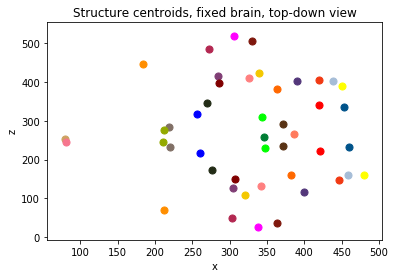

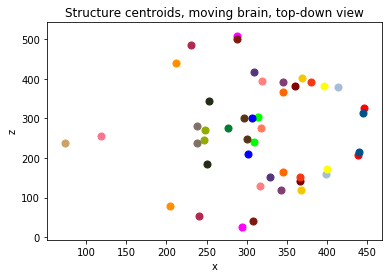

In [7]:
for label, c in structure_centroids_fixed_rel2fixed.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(label)])/255., marker='o', s=50)
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, fixed brain, top-down view');
plt.show()
    
for label, c in structure_centroids_moving_rel2moving.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(label)])/255., marker='o', s=50)
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, moving brain, top-down view');
plt.show()

In [8]:
midplane_points_fixed_rel2fixed = compute_midpoints(structure_centroids_fixed_rel2fixed)
midplane_vector_fixed, midplane_centroid_fixed_rel2fixed = fit_plane(midplane_points_fixed_rel2fixed.values())

print 'mid-sagittal plane normal =', midplane_vector_fixed
print 'mid-sagittal plane centroid =', midplane_centroid_fixed_rel2fixed 

mid-sagittal plane normal = [ 0.03639325 -0.09139192  0.99514976]
mid-sagittal plane centroid = [258.9775392  318.80293053 267.61576123]


In [9]:
midplane_points_moving_rel2moving = compute_midpoints(structure_centroids_moving_rel2moving)
midplane_vector_moving, midplane_centroid_moving_rel2moving = fit_plane(midplane_points_moving_rel2moving.values())

print 'mid-sagittal plane normal =', midplane_vector_moving
print 'mid-sagittal plane centroid =', midplane_centroid_moving_rel2moving 

mid-sagittal plane normal = [-0.04418231 -0.03820326  0.99829276]
mid-sagittal plane centroid = [296.4675136  303.5707196  265.46964496]


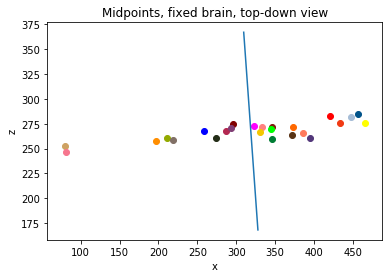

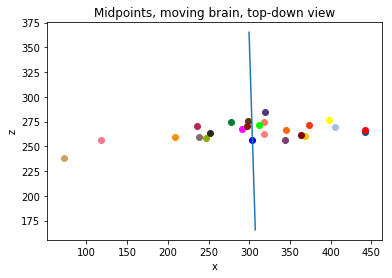

In [10]:
for name_u, c in midplane_points_fixed_rel2fixed.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='o')
    
d = 100
e1 = midplane_centroid_fixed_rel2fixed - midplane_vector_fixed * d
e2 = midplane_centroid_fixed_rel2fixed + midplane_vector_fixed * d
plt.plot([e1[1], e2[1]], [e1[2], e2[2]])
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Midpoints, fixed brain, top-down view');
plt.show()

####################

for name_u, c in midplane_points_moving_rel2moving.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='o')

d = 100
e1 = midplane_centroid_moving_rel2moving - midplane_vector_moving * d
e2 = midplane_centroid_moving_rel2moving + midplane_vector_moving * d
plt.plot([e1[1], e2[1]], [e1[2], e2[2]])
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Midpoints, moving brain, top-down view');
plt.show()

In [11]:
R = R_align_two_vectors(midplane_vector_moving, midplane_vector_fixed)

In [12]:
T_align_midplane = np.zeros((3,4))
T_align_midplane[:3, :3] = R
T_align_midplane = T_align_midplane.flatten()

print T_align_midplane.reshape((3,4))

[[ 0.99675439 -0.00328702  0.08044388  0.        ]
 [ 0.00756948  0.99856614 -0.05299953  0.        ]
 [-0.08015438  0.05343634  0.99535006  0.        ]]


In [13]:
volume_moving_midplaneAligned_rel2fixed = {label_s: transform_volume_v3(vol=vol.astype(np.int), origin=(0,0,0),
                                                          tf_params=T_align_midplane, 
                                                          centroid_m=midplane_centroid_moving_rel2moving, 
                                                          centroid_f=midplane_centroid_fixed_rel2fixed) 
                                  for label_s, vol in volume_moving.iteritems()}

/home/yuncong/Brain/utilities/registration_utilities.py:3059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(volume_m_aligned_to_f.dtype, np.float):
Interpolating/filling sparse volume: 0.11 seconds.
Interpolating/filling sparse volume: 0.09 seconds.
Interpolating/filling sparse volume: 0.01 seconds.
Interpolating/filling sparse volume: 0.01 seconds.
Interpolating/filling sparse volume: 0.20 seconds.
Interpolating/filling sparse volume: 0.18 seconds.
Interpolating/filling sparse volume: 0.42 seconds.
Interpolating/filling sparse volume: 0.36 seconds.
Interpolating/filling sparse volume: 0.02 seconds.
Interpolating/filling sparse volume: 0.02 seconds.
Interpolating/filling sparse volume: 0.07 seconds.
Interpolating/filling sparse volume: 0.06 seconds.
Interpolating/filling sparse volume: 0.25 seconds.
Interpolating/filling sparse volume: 

In [14]:
# volume_moving_midplane_aligned = \
# {label_s: crop_and_pad_volume(vol_inbbox, bbox, out_bbox=(0, xdim_f-1, 0, ydim_f-1, 0, zdim_f-1)) 
#  for label_s, (vol_inbbox, bbox) in volume_moving_midplane_aligned.iteritems()}

In [15]:
structure_centroids_m_midplaneAligned_rel2fixed = \
{midsagittal_aligner_parameters['label_to_structure_moving'][i]: c 
 for i, c in get_structure_centroids(vol_bbox_dict=volume_moving_midplaneAligned_rel2fixed).iteritems()}

In [16]:
midplane_points_m_midplaneAligned_rel2fixed = compute_midpoints(structure_centroids_m_midplaneAligned_rel2fixed)

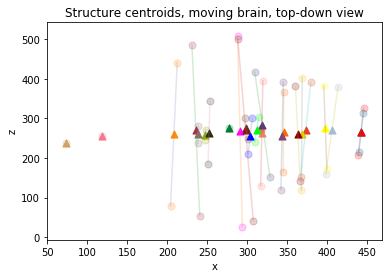

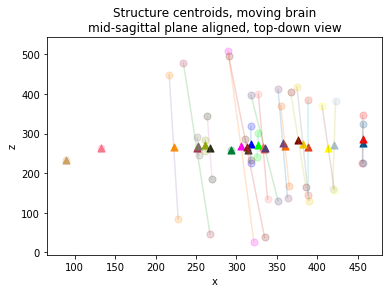

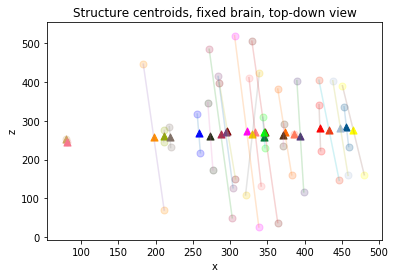

In [17]:
for name_s, c in structure_centroids_moving_rel2moving.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
                marker='o', alpha=.2, s=50)
    
for name_u, c in midplane_points_moving_rel2moving.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='^', s=50)
    
for name_u in set([convert_to_original_name(name_s) for name_s in structure_centroids_moving_rel2moving.keys()]):
    if name_u not in singular_structures:
        name_l = convert_to_left_name(name_u)
        name_r = convert_to_right_name(name_u)
        if name_l in structure_centroids_moving_rel2moving:
            e1 = structure_centroids_moving_rel2moving[name_l]
        if name_r in structure_centroids_moving_rel2moving:
            e2 = structure_centroids_moving_rel2moving[name_r]
        plt.plot((e1[1], e2[1]), (e1[2], e2[2]), alpha=.2);
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, moving brain, top-down view');
plt.show()

##########################################################

for name_s, c in structure_centroids_m_midplaneAligned_rel2fixed.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
                marker='o', alpha=.2, s=50)

for name_u, c in midplane_points_m_midplaneAligned_rel2fixed.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='^', s=50)
    
for name_u in set([convert_to_original_name(name_s) for name_s in structure_centroids_m_midplaneAligned_rel2fixed.keys()]):
    if name_u not in singular_structures:
        name_l = convert_to_left_name(name_u)
        name_r = convert_to_right_name(name_u)
        if name_l in structure_centroids_m_midplaneAligned_rel2fixed:
            e1 = structure_centroids_m_midplaneAligned_rel2fixed[name_l]
        if name_r in structure_centroids_m_midplaneAligned_rel2fixed:
            e2 = structure_centroids_m_midplaneAligned_rel2fixed[name_r]
        plt.plot((e1[1], e2[1]), (e1[2], e2[2]), alpha=.2);   
    
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, moving brain\nmid-sagittal plane aligned, top-down view');
plt.show()

##########################################################

for name_s, c in structure_centroids_fixed_rel2fixed.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
                marker='o', alpha=.2, s=50)
    
for name_u, c in midplane_points_fixed_rel2fixed.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='^', s=50)
    
for name_u in set([convert_to_original_name(name_s) for name_s in structure_centroids_fixed_rel2fixed.keys()]):
    if name_u not in singular_structures:
        name_l = convert_to_left_name(name_u)
        name_r = convert_to_right_name(name_u)
        if name_l in structure_centroids_fixed_rel2fixed:
            e1 = structure_centroids_fixed_rel2fixed[name_l]
        if name_r in structure_centroids_fixed_rel2fixed:
            e2 = structure_centroids_fixed_rel2fixed[name_r]
        plt.plot((e1[1], e2[1]), (e1[2], e2[2]), alpha=.2);
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, fixed brain, top-down view');
plt.show()

In [18]:
for name_s in all_known_structures_sided:
    
    print name_s
    
    try:
    
        volume, origin_wrt_wholebrain = \
            DataManager.load_original_volume_v2(stack_spec=stack_m_spec, 
                                                   structure=name_s,
                                                  resolution='10.0um',
                                                  return_origin_instead_of_bbox=True)

    except:
        sys.stderr.write("Cannot load moving brain for %s\n" % name_s)
        continue
            
    vol, bbox_wrt_fixedWholebrain = \
    transform_volume_v3(vol=volume.astype(np.int), 
                        origin=origin_wrt_wholebrain,
                      tf_params=T_align_midplane, 
                      centroid_m=midplane_centroid_moving_rel2moving + midsagittal_aligner_parameters['volume_moving_origin_wrt_wholebrain'],
                      centroid_f=midplane_centroid_fixed_rel2fixed + midsagittal_aligner_parameters['volume_fixed_origin_wrt_wholebrain'],
                             return_origin_instead_of_bbox=False)
    
    vol_fp = DataManager.get_transformed_volume_filepath_v2(midsagittal_alignment_spec, structure=name_s)
    create_parent_dir_if_not_exists(vol_fp)
    bp.pack_ndarray_file(vol, vol_fp)
    upload_to_s3(vol_fp)
    
    bbox_fp = \
    DataManager.get_transformed_volume_bbox_filepath_v2(midsagittal_alignment_spec, 
                                                        structure=name_s, 
                                                        wrt='fixedWholebrain')
    create_parent_dir_if_not_exists(bbox_fp)
    np.savetxt(bbox_fp, bbox_wrt_fixedWholebrain)
    upload_to_s3(bbox_fp)

5N_L
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L.bp"


Interpolating/filling sparse volume: 0.11 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L_bbox_wrt_fixedWholebrain.txt"
0
5N_R
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.10 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_R_bbox_wrt_fixedWholebrain.txt"
0
6N_L
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.02 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_L_bbox_wrt_fixedWholebrain.txt"
0
6N_R
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.02 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_R_bbox_wrt_fixedWholebrain.txt"
0
7N_L


Interpolating/filling sparse volume: 0.21 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_L_bbox_wrt

Interpolating/filling sparse volume: 0.18 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_R_bbox_wrt

Interpolating/filling sparse volume: 0.41 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_L_bbox_wrt

Interpolating/filling sparse volume: 0.36 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_R_bbox_wrt

Interpolating/filling sparse volume: 0.02 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_L_bbox_wrt_fixedWholebrain.txt"
0
Amb_R
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotat

Interpolating/filling sparse volume: 0.02 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_R_bbox_wrt_fixedWholebrain.txt"
0
LC_L
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotatio

Interpolating/filling sparse volume: 0.07 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_L_bbox_wrt_fixedWholebrain.txt"
0
LC_R
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.07 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_R_bbox_wrt_fixedWholebrain.txt"
0
LRt_L


Interpolating/filling sparse volume: 0.25 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_L_bbox

Interpolating/filling sparse volume: 0.30 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_R_bbox

Interpolating/filling sparse volume: 0.31 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_L_bbox_wrt

Interpolating/filling sparse volume: 0.24 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_R_bbox_wrt

Interpolating/filling sparse volume: 0.06 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_L_bbox_wrt_fixedWholebrain.txt"
0
Tz_R
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.07 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_R_bbox_wrt_fixedWholebrain.txt"
0
VLL_L


Interpolating/filling sparse volume: 0.39 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_L_bbox

Interpolating/filling sparse volume: 0.30 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_R_bbox

Interpolating/filling sparse volume: 0.09 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_L_bbox_wrt_fixedWholebrain.txt"
0
RMC_R
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotat

Interpolating/filling sparse volume: 0.11 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_R_bbox_wrt_fixedWholebrain.txt"
0
SNC_L


Interpolating/filling sparse volume: 0.20 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_L_bbox

Interpolating/filling sparse volume: 0.19 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_R_bbox

Interpolating/filling sparse volume: 0.78 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L_bbox

Interpolating/filling sparse volume: 0.73 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_R_bbox

Interpolating/filling sparse volume: 0.04 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_L_bbox_wrt_fixedWholebrain.txt"
0
3N_R
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.04 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_R_bbox_wrt_fixedWholebrain.txt"
0
4N_L
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.02 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_L_bbox_wrt_fixedWholebrain.txt"
0
4N_R
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.01 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_R_bbox_wrt_fixedWholebrain.txt"
0
Sp5I_L
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotat

Interpolating/filling sparse volume: 0.11 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_L_bbox_wrt_fixedWholebrain.txt"
0
Sp5I_R


Interpolating/filling sparse volume: 0.22 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_R_

Interpolating/filling sparse volume: 0.26 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_L_

Interpolating/filling sparse volume: 0.30 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_R_

Interpolating/filling sparse volume: 1.47 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_L_

Interpolating/filling sparse volume: 0.76 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_R_

Interpolating/filling sparse volume: 0.07 seconds.



0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_L_bbox_wrt_fixedWholebrain.txt"
0
PBG_R
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annota

Interpolating/filling sparse volume: 0.07 seconds.



0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_R_bbox_wrt_fixedWholebrain.txt"
0
10N_L
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annota

Interpolating/filling sparse volume: 0.09 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_L_bbox_wrt_fixedWholebrain.txt"
0
10N_R
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotat

Interpolating/filling sparse volume: 0.08 seconds.



0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R_bbox_wrt_fixedWholebrain.txt"
0
VCA_L


Interpolating/filling sparse volume: 0.29 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L_bbox

Interpolating/filling sparse volume: 0.25 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_R_bbox

Interpolating/filling sparse volume: 0.17 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_L_bbox_wrt_fixedWholebrain.txt"
0
VCP_R


Interpolating/filling sparse volume: 0.17 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_R_bbox

Interpolating/filling sparse volume: 0.24 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_L_bbox_wrt

Interpolating/filling sparse volume: 0.25 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_R_bbox_wrt

Interpolating/filling sparse volume: 0.05 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_AP_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_AP_bbox_wrt_fixedWholebrain.txt"
0
12N


Interpolating/filling sparse volume: 0.21 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_12N.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_12N.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_12N_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_12N_bbox_wrt_fix

Interpolating/filling sparse volume: 0.66 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg_bbox_wrt

Interpolating/filling sparse volume: 4.13 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SC.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SC.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SC_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_SC_bbox_wrt_fixedWh

Interpolating/filling sparse volume: 1.78 seconds.


aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_IC.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_IC.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_IC_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp8_MD589_10.0um_annotationAsScoreVolume_10.0um_IC_bbox_wrt_fixedWh

# Affine registration, under the constaint that mid-sagittal plane is aligned.

In [19]:
# warp_setting = 9

In [9]:
affine_alignment_spec = dict(stack_m=stack_m_spec, 
                            stack_f=stack_f_spec,
                            warp_setting=9,
                            initial_alignment_spec=midsagittal_alignment_spec)

In [11]:
affine_aligner_parameters = generate_aligner_parameters(alignment_spec=affine_alignment_spec,
structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
structures_f=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
)

upstream_warp_id                                                                  8
transform_type                                                                rigid
terminate_thresh                                                              1e-06
grad_computation_sample_number                                               100000
grid_search_sample_number                                                     10000
std_tx_um                                                                      2000
std_ty_um                                                                      2000
std_tz_um                                                                      2000
std_theta_xy_degree                                                              30
surround_weight                                                                 NaN
regularization_weight                                                           NaN
comment                           global registration given mid-sagittal pla

Prior structure/index map not found. Generating a new one.
Loaded moving volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].
Prior structure/index map not found. Generating a new one.


voxel size for moving = 10.00 um
voxel size for fixed = 10.00 um


Loaded fixed volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].


In [22]:
volume_fixed = affine_aligner_parameters['volume_fixed']
volume_moving = affine_aligner_parameters['volume_moving']

In [23]:
aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f=affine_aligner_parameters['label_mapping_m2f'])

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


In [24]:
aligner.set_centroid(centroid_m='volume_centroid', centroid_f='volume_centroid')
# aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', indices_m=[structure_to_label_moving['IC']])

centroid_m: [375.5 239.  270. ], centroid_f: [310.  255.5 276.5]


In [25]:
# Because annotated brain volumes are similar, grid search is not necessary. 

# grid_search_T, grid_search_score = aligner.do_grid_search(grid_search_iteration_number=1000, 
#                        grid_search_sample_number=10,
#                       std_tx=std_tx, std_ty=std_ty, std_tz=0, std_theta_xy=0,
#                        grid_search_eta=3.)

In [26]:
gradients_f = compute_gradient(volume_fixed, smooth_first=True)
aligner.load_gradient(gradients=gradients_f)

Computing gradient for 1
Computing gradient for 2
Computing gradient for 3
Computing gradient for 4
Computing gradient for 5
Computing gradient for 6
Computing gradient for 7
Computing gradient for 8
Computing gradient for 9
Computing gradient for 10
Computing gradient for 11
Computing gradient for 12
Computing gradient for 13
Computing gradient for 14
Computing gradient for 15
Computing gradient for 16
Computing gradient for 17
Computing gradient for 18
Computing gradient for 19
Computing gradient for 20
Computing gradient for 21
Computing gradient for 22
Computing gradient for 23
Computing gradient for 24
Computing gradient for 25
Computing gradient for 26
Computing gradient for 27
Computing gradient for 28
Computing gradient for 29
Computing gradient for 30
Computing gradient for 31
Computing gradient for 32
Computing gradient for 33
Computing gradient for 34
Computing gradient for 35
Computing gradient for 36
Computing gradient for 37
Computing gradient for 38
Computing gradient fo

indices_f: set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])


In [27]:
# gradient_filepath_map_f = {ind_f: DataManager.get_volume_gradient_filepath_template(\
#                             stack=stack_fixed, structure=label_to_structure_fixed[ind_f],
#                             downscale=32, volume_type='annotationAsScore')
#                            for ind_m, ind_f in label_mapping_m2f.iteritems()}

In [28]:
# aligner.load_gradient(gradient_filepath_map_f=gradient_filepath_map_f)

In [29]:
aligner.set_label_weights(label_weights=affine_aligner_parameters['label_weights_m'])

In [30]:
# T = grid_search_T

In [31]:
T, scores = aligner.optimize(tf_type=affine_aligner_parameters['transform_type'], 
                             max_iter_num=200,
                             history_len=50, 
#                              terminate_thresh=1e-4,
                             terminate_thresh_trans=.01,
                             grad_computation_sample_number=100000,
                             full_lr=np.array([10,10,0,0,0,.1]), # shift along z axis, rotations around x axis and y axis are frozen
#                              init_T=grid_search_T
                            )                                  
# traj = aligner.Ts


iteration 0
Error computing score/gradient for 9: Image gradient at all valid voxel is zero.
Error computing score/gradient for 10: Image gradient at all valid voxel is zero.
Error computing score/gradient for 22: Image gradient at all valid voxel is zero.
Error computing score/gradient for 24: Image gradient at all valid voxel is zero.
Error computing score/gradient for 27: Image gradient at all valid voxel is zero.
Error computing score/gradient for 28: Image gradient at all valid voxel is zero.
Error computing score/gradient for 29: Image gradient at all valid voxel is zero.
Error computing score/gradient for 30: Image gradient at all valid voxel is zero.
Error computing score/gradient for 33: Image gradient at all valid voxel is zero.
Error computing score/gradient for 34: Image gradient at all valid voxel is zero.
Error computing score/gradient for 35: Image gradient at all valid voxel is zero.
Error computing score/gradient for 36: Image gradient at all valid voxel is zero.
Erro

Error computing score/gradient for 22: Image gradient at all valid voxel is zero.
Error computing score/gradient for 23: Image gradient at all valid voxel is zero.
Error computing score/gradient for 24: Image gradient at all valid voxel is zero.
Error computing score/gradient for 27: Image gradient at all valid voxel is zero.
Error computing score/gradient for 28: Image gradient at all valid voxel is zero.
Error computing score/gradient for 29: Image gradient at all valid voxel is zero.
Error computing score/gradient for 30: Image gradient at all valid voxel is zero.
Error computing score/gradient for 35: Image gradient at all valid voxel is zero.
Error computing score/gradient for 36: Image gradient at all valid voxel is zero.
Error computing score/gradient for 43: Image gradient at all valid voxel is zero.
Norm of gradient (translation) = 0.520354
Norm of gradient (rotation) = 0.497001
around x=0.00; around y=-0.00; around z=1.31
step: 3.30 seconds
current score: -8.317852
new_T: [17

Error computing score/gradient for 29: Image gradient at all valid voxel is zero.
Error computing score/gradient for 30: Image gradient at all valid voxel is zero.
Norm of gradient (translation) = 0.384146
Norm of gradient (rotation) = 0.405904
around x=0.00; around y=-0.00; around z=14.08
step: 3.23 seconds
current score: -7.564102
new_T: [33.97017586 24.84212391  0.        ]
det: 1.00

iteration 21
Error computing score/gradient for 29: Image gradient at all valid voxel is zero.
Error computing score/gradient for 30: Image gradient at all valid voxel is zero.
Norm of gradient (translation) = 0.375462
Norm of gradient (rotation) = 0.320132
around x=0.00; around y=-0.00; around z=13.41
step: 3.21 seconds
current score: -7.557484
new_T: [35.79885041 23.16142589  0.        ]
det: 1.00

iteration 22
Error computing score/gradient for 29: Image gradient at all valid voxel is zero.
Error computing score/gradient for 30: Image gradient at all valid voxel is zero.
Norm of gradient (translatio

Norm of gradient (translation) = 0.195371
Norm of gradient (rotation) = 0.203551
around x=0.00; around y=-0.00; around z=14.56
step: 3.26 seconds
current score: -7.542618
new_T: [37.28731958 24.61303579  0.        ]
det: 1.00

iteration 41
Error computing score/gradient for 29: Image gradient at all valid voxel is zero.
Error computing score/gradient for 30: Image gradient at all valid voxel is zero.
Norm of gradient (translation) = 0.192634
Norm of gradient (rotation) = 0.201492
around x=0.00; around y=-0.00; around z=14.58
step: 3.20 seconds
current score: -7.542588
new_T: [37.32460954 24.62365324  0.        ]
det: 1.00

iteration 42
Error computing score/gradient for 29: Image gradient at all valid voxel is zero.
Error computing score/gradient for 30: Image gradient at all valid voxel is zero.
Norm of gradient (translation) = 0.189165
Norm of gradient (rotation) = 0.198425
around x=0.00; around y=-0.00; around z=14.59
step: 3.20 seconds
current score: -7.541681
new_T: [37.35974653 2

Error computing score/gradient for 29: Image gradient at all valid voxel is zero.
Error computing score/gradient for 30: Image gradient at all valid voxel is zero.
Norm of gradient (translation) = 0.147373
Norm of gradient (rotation) = 0.164288
around x=0.00; around y=-0.00; around z=14.72
step: 3.21 seconds
current score: -7.543488
new_T: [37.69167462 24.79800793  0.        ]
det: 1.00

iteration 62
Error computing score/gradient for 29: Image gradient at all valid voxel is zero.
Error computing score/gradient for 30: Image gradient at all valid voxel is zero.
Norm of gradient (translation) = 0.146104
Norm of gradient (rotation) = 0.163253
around x=0.00; around y=-0.00; around z=14.72
step: 3.22 seconds
current score: -7.542464
new_T: [37.69579587 24.8093757   0.        ]
det: 1.00

iteration 63
Error computing score/gradient for 29: Image gradient at all valid voxel is zero.
Error computing score/gradient for 30: Image gradient at all valid voxel is zero.
Norm of gradient (translatio

Norm of gradient (translation) = 0.123234
Norm of gradient (rotation) = 0.142944
around x=0.00; around y=-0.00; around z=14.74
step: 3.21 seconds
current score: -7.544139
new_T: [37.75642715 24.82847606  0.        ]
det: 1.00

iteration 82
Error computing score/gradient for 29: Image gradient at all valid voxel is zero.
Error computing score/gradient for 30: Image gradient at all valid voxel is zero.
Norm of gradient (translation) = 0.122374
Norm of gradient (rotation) = 0.141465
around x=0.00; around y=-0.00; around z=14.75
step: 3.19 seconds
current score: -7.543681
new_T: [37.74600278 24.82386653  0.        ]
det: 1.00

iteration 83
Error computing score/gradient for 29: Image gradient at all valid voxel is zero.
Error computing score/gradient for 30: Image gradient at all valid voxel is zero.
Norm of gradient (translation) = 0.121604
Norm of gradient (rotation) = 0.142060
around x=0.00; around y=-0.00; around z=14.75
step: 3.19 seconds
current score: -7.543042
new_T: [37.75572215 2

KeyboardInterrupt: 

In [ ]:
print T.reshape((3,4))
plt.plot(scores);
print max(scores), scores[-1]

# Export parameters and score plots

In [ ]:
transform_parameters = {
    'parameters': aligner.Ts[-1],
    'centroid_m': aligner.centroid_m,
    'centroid_f': aligner.centroid_f,
    'domain_m_origin_wrt_wholebrain': affine_aligner_parameters['volume_moving_origin_wrt_wholebrain'],
    'domain_f_origin_wrt_wholebrain': affine_aligner_parameters['volume_fixed_origin_wrt_wholebrain']
}

In [ ]:
DataManager.save_alignment_results_v2(transform_parameters=transform_parameters,
                       score_traj=scores,
                       parameter_traj=aligner.Ts,
                      alignment_spec=affine_alignment_spec)

In [ ]:
for name_s in all_known_structures_sided:
# for name_s in ['7N_L']:
    
    try:
        volume, bbox_wrt_fixedWholebrain = \
            DataManager.load_transformed_volume_v2(alignment_spec=midsagittal_alignment_spec, 
                                                   structure=name_s,
                                                  resolution='10.0um',
                                                  return_origin_instead_of_bbox=False)        
    except:
        sys.stderr.write("Cannot load moving brain for %s\n" % name_s)
        continue
            
            
    transformed_vol, transformed_vol_bbox_wrt_fixedWholebrain = transform_volume_by_alignment_parameters(volume, bbox=bbox_wrt_fixedWholebrain,
                                                                                                        transform_parameters=transform_parameters)
    print transformed_vol.shape, transformed_vol_bbox_wrt_fixedWholebrain
    DataManager.save_transformed_volume(volume=transformed_vol, 
                                        bbox=transformed_vol_bbox_wrt_fixedWholebrain, 
                                        alignment_spec=affine_alignment_spec, 
                                        resolution='%.1fum' % affine_aligner_parameters['resolution_um'], 
                                        structure=name_s)

# Temp

In [15]:
volume, bbox_wrt_fixedWholebrain = \
    DataManager.load_transformed_volume_v2(alignment_spec=midsagittal_alignment_spec, 
                                           structure=name_s,
                                          resolution='10.0um',
                                          return_origin_instead_of_bbox=False)     

In [12]:
for name_s in all_known_structures_sided:
# for name_s in ['7N_L']:
    
    try:
        transformed_vol, transformed_vol_bbox_wrt_fixedWholebrain = \
            DataManager.load_transformed_volume_v2(alignment_spec=affine_alignment_spec, 
                                                   structure=name_s,
                                                  resolution='10.0um',
                                                  return_origin_instead_of_bbox=False)        
    except Exception as e:
        raise e
        sys.stderr.write("Cannot load moving brain for %s\n" % name_s)
        continue
            
    print transformed_vol.shape, transformed_vol_bbox_wrt_fixedWholebrain
    DataManager.save_transformed_volume(volume=transformed_vol, 
                                        bbox=transformed_vol_bbox_wrt_fixedWholebrain, 
                                        alignment_spec=affine_alignment_spec, 
                                        resolution='%.1fum' % affine_aligner_parameters['resolution_um'], 
                                        structure=name_s)

(76, 71, 49) [1098. 1168.  535.  610.  305.  353.]
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_

0
(21, 50, 14) [1269. 1318.  651.  671.  332.  345.]
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_M

0
(42, 86, 42) [1064. 1149.  658.  699.  399.  440.]
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD58

0
(167, 150, 138) [ 903. 1052.  463.  629.  269.  406.]
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp

0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R_bbox_wrt_fixedWholebrain.txt"
0
(113, 121, 60) [1104. 1224.  512.  624.  194.  253.]
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_ann

0
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_12N_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_12N_bbox_wrt_fixedWholebrain.txt"
0
(90, 134, 169) [1001. 1134.  583.  672.  395.  563.]
aws s3 cp "/home/yuncong/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotati